In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


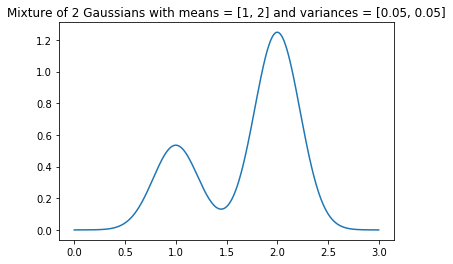

In [2]:
# plot the probability density function for a mixture of two Gaussian distributions
import scipy.stats

means = [1, 2]
variances = [.05, .05]
proportions = [.3, .7]
x = linspace(0, 3, 3000)
y = proportions[0] * scipy.stats.norm.pdf(x, loc=means[0], scale=sqrt(variances[0])) +\
    proportions[1] * scipy.stats.norm.pdf(x, loc=means[1], scale=sqrt(variances[1]))
title('Mixture of 2 Gaussians with means = ' + str(means) + ' and variances = ' + str(variances))
plot(x, y)

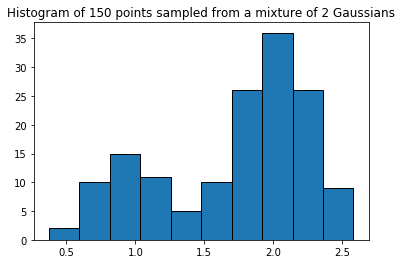

In [3]:
# sample some points from the mixture
np.random.seed(123)
N = 150
n1 = int(N * proportions[0])
n2 = N - n1
sampled_points = normal(means[0], sqrt(variances[0]), n1)
sampled_points = np.append(sampled_points, normal(means[1], sqrt(variances[1]), n2))

title('Histogram of ' + str(N) + ' points sampled from a mixture of 2 Gaussians')
hist(sampled_points, bins=10, edgecolor='k');

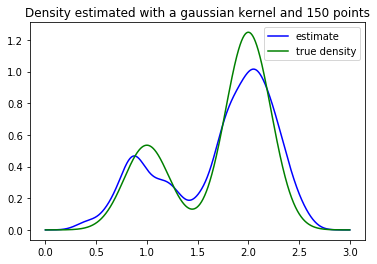

In [4]:
# kernel density estimation (page 123 in PRML (2.250))
def my_gaussian_kde(x, sampled_points, h):
    return 1.0/len(sampled_points) * sum([1/sqrt(2*pi*h**2) * exp((-1/(2*h**2))*(x-p_i)**2) for p_i in sampled_points])

title('Density estimated with a gaussian kernel and ' + str(len(sampled_points)) + ' points')
plot(x, [my_gaussian_kde(x_i, sampled_points, .1) for x_i in x], color="blue", label='estimate')
plot(x, y, color="green", label='true density')

legend()

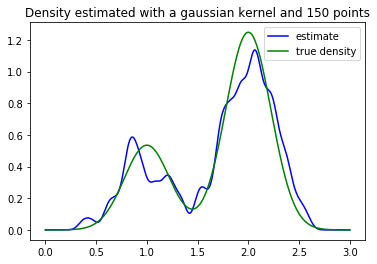

In [5]:
# small smoothing parameter (noisy estimation)
title('Density estimated with a gaussian kernel and ' + str(len(sampled_points)) + ' points')
plot(x, [my_gaussian_kde(x_i, sampled_points, .05) for x_i in x], color="blue", label='estimate')
plot(x, y, color="green", label='true density')
legend()

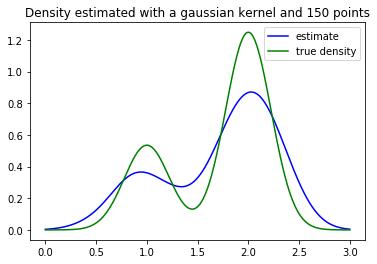

In [6]:
# big smoothing parameter (oversmoothing)
title('Density estimated with a gaussian kernel and ' + str(len(sampled_points)) + ' points')
plot(x, [my_gaussian_kde(x_i, sampled_points, .2) for x_i in x], color="blue", label='estimate')
plot(x, y, color="green", label='true density')
legend()